# АНАЛИЗ ДОХОДНОСТИ  КОМПЬЮТЕРНЫХ ИГР

## ЦЕЛЬ ИССЛЕДОВАНИЯ

1.Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

2.Проверить гипотезы:

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


### Ход исследования

Данные о поведении пользователей получим из файла /datasets/games.csv. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в шесть этапов:

1. Ознакомление с данными.
2. Подготовка данных.
3. Исследователький анализ данных.
4. Составим портрет пользователя каждого региона.
5. Проверка гипотез.
6. Общий вывод.

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


# Шаг 1. Ознакомление с данными

Откроем файл с данными, сохраним в переменной df, выведем первые 10 строк, и изучим общую информацию:

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Шаг 2. Подготовка данных. 

2.1 Привети названия столбцов к нижнему регистру.

In [4]:
df.columns = df.columns.str.lower()

2.2 Замена типов данных

Выведя информацию о датафрейме заметили несоответствие типов данных в колонаках year_of_release - год выпуска (стоит float64, но год это целочисленный тип) заменим на int, user_score - оценка критиков (это численный показатель, но имеет тип object) меняем на float.

In [5]:
df['year_of_release'] = pd.array(df['year_of_release'], dtype = pd.Int64Dtype())

In [6]:
#Посмотрим данные колонки user_score:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо чисел и NaN-ов встречаем значение "tbd". tbd - это аббревиатура от To Be Determined. Указываю, когда игра имеет недостаточное количество отзывов для подсчета рейтинга пользователей и его публикации. tbd фактически означает отсутствие данных. Заменим его на NaN. Затем поменяем тип данных на float.

In [58]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')


2.3 Обработка пропусков

Запросим информацию по количеству пропусков в каждом столбце

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Больше всего пропусков в столбцах critic_score - оценка критиков, user_score - оценка пользователей,
rating - рэйтинг. Рассмотрим каждый случай отдельно.
Пропуски в столбцах critic_score и user_score говорят об отсутсвии оценок, оставим их как есть.
Изучим пропуски в столбце rating. rating от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Изучим уникальный список таких категорий в нашем датафрейме.

In [9]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)


EC — Early Childhood «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры; Устаревшая градация.

E — Everyone «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально K-A ("Kids to Adults");

E10+ — Everyone 10+ «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;

T — Teen «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;

M — Mature «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории;

AO — Adults Only Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением;

RP — Rating Pending Рейтинг ожидается.

Таким образом значение рейтинга K-A и EC можем заменить на E.


In [10]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'
df.loc[df['rating'] == 'EC', 'rating'] = 'E'

Расшифровав данные оценки отметим что RP означает, что Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Значит пропуски это скорее отсутсвие всякого рэйтига по не известным причинам. Вывидем информацию по тем строкам в которых рэйтинг отсутсвует и сохраним в переменной df_not_rating.

In [11]:
df_not_rating = df.loc[df['rating'].isna()]
df_not_rating

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
#посчитаем пропуски в колонках
df_not_rating.isna().sum()

name                  2
platform              0
year_of_release      88
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       6683
user_score         6680
rating             6766
dtype: int64

Почти у всех игр, где отсутсвует рейтинг также отсутсвуют оценки. Так же наличие пропусков в рэйтинге можно соотнести с тем что, организации ESRB была основана в 1994 году, а вданных присутвтуют игры с 1980 года. В колонке rating заменим пропуски на "absent"

In [13]:
df['rating'] = df['rating'].fillna('absent')

2.4 Посчитаем суммарные продажи по всем регионам

In [14]:
# Посчитаем суммарное количество продаж во всех регионах и запишите в отдельный столбец total_sales:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,absent,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,absent,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,absent,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,absent,28.31


In [ ]:
# второй споспоб как посчитать суммарное количество продаж во всех регионах:
df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# Шаг 3. Исследователький анализ данных.

1. Cколько игр выпускалось в разные годы. 

Text(0.5, 1.0, 'Количество выпущенных игр')

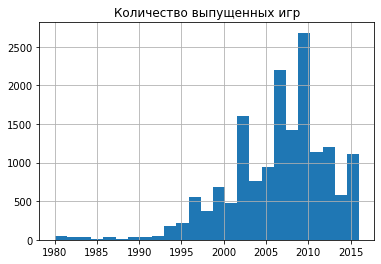

In [15]:
df['year_of_release'].hist(bins=25)
plt.title('Количество выпущенных игр')

Игры начали выпускать в 1980г, но их количество было небольшим. Ближе к  1995г, начинается рост выпуска видеоигр, который мы наблюдаем до 2010 года. После 2010 года количество выпускаемых игр резко пошло на спад. Больше всего игр выпускалось  с 2004 по 2010 годы.

2. Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [57]:
# Сгруппируем данные и посмотрим на общую суммы продаж. Отсортируем по убыванию суммы и выведем первые 7 платформ.
df_group_platform = df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False).head(7)

#Создадим из них список
lst = df_group_platform['platform'].to_list() 



Сделаем срез из таблицы df, в условие среза передадим список lst в котором мы вывели 7 платформ с наибольшими суммарными продажами. Результат сохраним в переменной df_top_7

In [17]:
df_top_7 = df.query('platform == @lst')

 Построим распределение по годам для этих данных. Для этого на основе df_top_7 создадим сводную таблицу. 

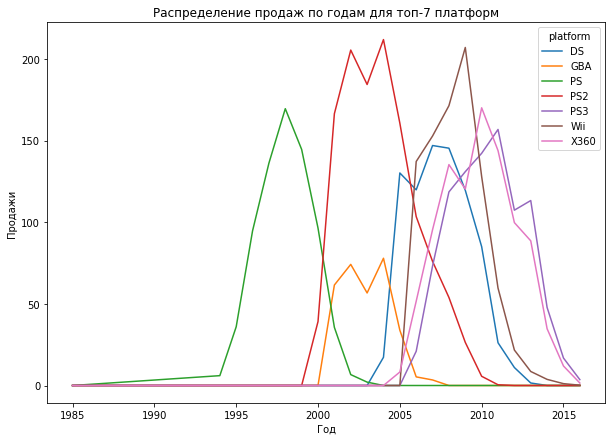

In [18]:
df_top_7_pivot = df_top_7.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').reset_index().fillna(0)        

ax = df_top_7_pivot.plot(x='year_of_release', figsize=(10,7))
plt.title('Распределение продаж по годам для топ-7 платформ')
ylab = ax.set_ylabel('Продажи')
xlab = ax.set_xlabel('Год')
plt.show()

По графику можно проследить что переод жизни платформы сотавляет примерно 10 - 12 лет.  Таким образом, для прогнозирования подаж на следующий год будем использовать данные за последние 2 года, чтобы выявить наиболее прибыльные напрвления на следующие 10 лет. 

3. Какие платформы лидируют по продажам, растут или падают? Выберим несколько потенциально прибыльных платформ. Построим ещё один график, распределения продаж по актуальным годам. Сделаем срез по актуальным годам и на его основе создадим сводную таблицу. Сохраним ее в переменной df_actual.

In [19]:
df_actual = df.query('year_of_release >= 2014') \
              .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
              .reset_index() \
              .fillna(0)

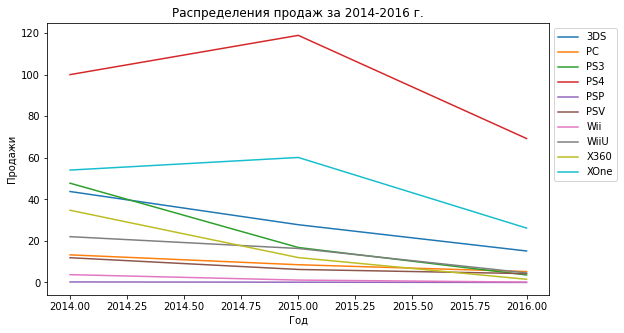

In [20]:
ax = df_actual.plot(x='year_of_release', figsize=(9,5))
plt.title('Распределения продаж за 2014-2016 г.')
ylab = ax.set_ylabel('Продажи')
xlab = ax.set_xlabel('Год')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Можно сделать вывод что к концу 2016 года лидерами по продажам были платформы:
 - PS4
 - XOne
 - 3DS

Постороим даграмму размаха по глобальным продажам игр в разбивке по самым лидирующим платформам. 

<Figure size 1080x504 with 0 Axes>

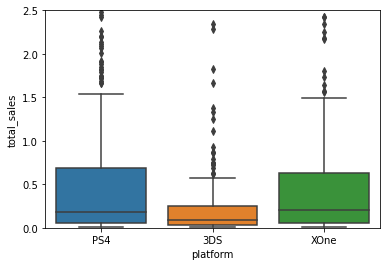

<Figure size 1080x504 with 0 Axes>

In [21]:
df_lider_salse = df.query('year_of_release >= 2014 and platform in ["PS4", "XOne", "3DS"]')
ax = sns.boxplot(x='platform', y='total_sales', data=df_lider_salse)
plt.ylim(0,2.5)
plt.figure(figsize =(15, 7))

Медианные значения у всех трех находятся примерно на уровне от 0,15 до 0,2 млн и стремится к нижней границе межквартитьного размаха. это может говорить о том что большпя часть игр выходящих на платформах имеют не очень высокие продажи. Верхняя граница для PS4 b XOne на позициях 1,7 и 1,6 соотвественно. Для 3DS она ниже 1 млн.

4. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 
В качаестве примера возьмем данные для платформы PS4. 

In [22]:
df_ps4 = df.query('platform == "PS4"')


0.406567902061781

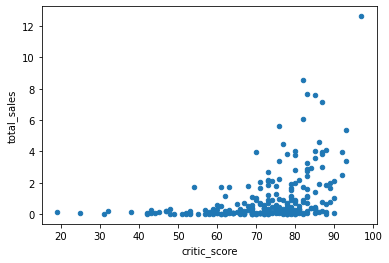

In [23]:
# Диаграмма рассеяния "отзывы критиков и продажи"
df_ps4.plot(x='critic_score', y='total_sales', kind='scatter') 
#Посчитаем корреляцию между отзывами критиков и продажами
df_ps4['total_sales'].corr(df_ps4['critic_score'])

-0.031957110204556376

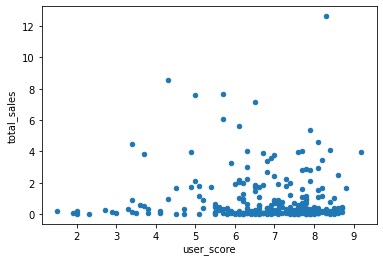

In [24]:
# Диаграмма рассеяния "отзывы пользователей и продажи"
df_ps4.plot(x='user_score', y='total_sales', kind='scatter') 
#Посчитаем корреляцию между отзывами пользователей и продажами
df_ps4['total_sales'].corr(df_ps4['user_score'])

Прямой зависимоти продаж от оценок пользователей не наблюдается. Оценки критиков имеют небольшое влияния на продажи.

Посмотрим на коэффициенты корэляции между оценками пользователей и критиков и продаж на других популярных платформах.


In [59]:
list = ["PS4", "XOne", "3DS"]
for i in list:
    corr = df.query('year_of_release >= 2014 and platform == @i') \
        [['total_sales','user_score', 'critic_score']].agg('corr')
    print(f'ККП для платформы {i}', f'{corr}', sep='\n')   

ККП для платформы PS4
              total_sales  user_score  critic_score
total_sales      1.000000   -0.040132      0.402661
user_score      -0.040132    1.000000      0.546434
critic_score     0.402661    0.546434      1.000000
ККП для платформы XOne
              total_sales  user_score  critic_score
total_sales      1.000000   -0.070384      0.428677
user_score      -0.070384    1.000000      0.440977
critic_score     0.428677    0.440977      1.000000
ККП для платформы 3DS
              total_sales  user_score  critic_score
total_sales      1.000000    0.215193      0.314117
user_score       0.215193    1.000000      0.862485
critic_score     0.314117    0.862485      1.000000


Что и требовалось доказать. Oценки пользователей никак не влияют на продажи. Небольшое значение все же есть у оценок критиков но не существенное.

5. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
Посмотрим какие самые популярные жанры в срезе самых прибыльных платформ в актуальном периоде.

In [26]:
df.query('year_of_release >= 2014 and platform in ["PS4", "XOne", "3DS"]')['genre'].value_counts()

Action          310
Role-Playing    106
Sports           81
Shooter          74
Adventure        63
Misc             56
Racing           36
Fighting         27
Platform         21
Simulation       19
Strategy         15
Puzzle            8
Name: genre, dtype: int64

Больше всего игра в жанре Action, Role-Playing, Sports. Action безусловный лидер. Посмотрим на распределение продаж по жанрам. Для анализа возьмем медианный и средние значения продаж, так как под большой общей суммой продаж может скрываться большое колличество игр с невысокими доходами и всего пара бесцеллеров. Нам нужен жанр со стабильно высокоми продажами.

<AxesSubplot:title={'center':'распределение продаж по жанрам'}, xlabel='genre'>

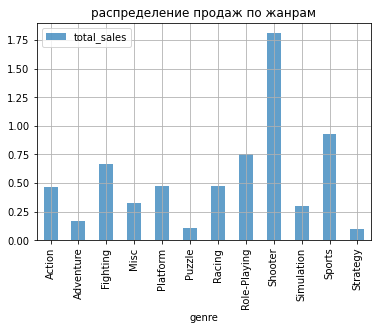

In [27]:
top_platform = df.query('year_of_release >= 2014 and platform in ["PS4", "XOne", "3DS"]')
#Создадим сводные таблицы со средним и медианными значениями продаж по жанрам
top_platform_pivot_mean = top_platform.pivot_table(index='genre', values='total_sales', aggfunc='mean').reset_index()
top_platform_pivot_median = top_platform.pivot_table(index='genre', values='total_sales', aggfunc='median').reset_index()
# Построим диаграмму для средних значений
top_platform_pivot_mean.plot(x='genre', kind='bar', stacked=True, alpha=0.7, grid=True, title="распределение продаж по жанрам")


<AxesSubplot:title={'center':'распределение продаж по жанрам'}, xlabel='genre'>

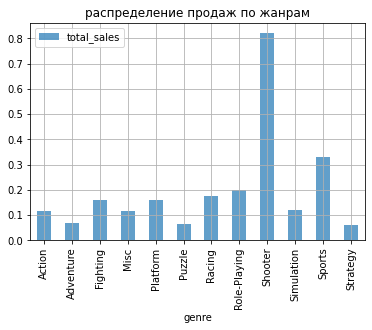

In [28]:
# Построим диаграмму для медианных значений
top_platform_pivot_median.plot(x='genre', kind='bar', stacked=True, alpha=0.7, grid=True, title="распределение продаж по жанрам")

Несомненным лидером является жанр Shooter. Следующий за ним жанр Sports.

# Шаг 4. Составим портрет пользователя каждого региона

Самые популярные платформы  для каждого региона. 

<AxesSubplot:title={'center':'Платформы и продажи'}, xlabel='platform'>

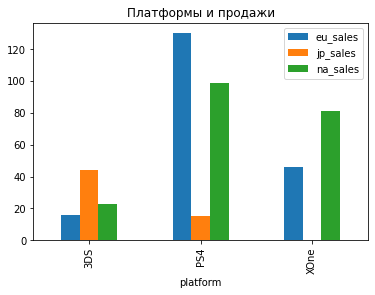

In [62]:
df.query('year_of_release >= 2014 and platform == @list') \
  .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum') \
  .reset_index().plot(kind='bar', x='platform', title='Платформы и продажи')


Для Северной Америки самые популярные приставки PS4 и Xone. 
В Европе популярна PS4 за ней Xone.
В Японии Лидер - DS.

Самые популярные жанры.

<AxesSubplot:title={'center':'Жанры и продажи'}, xlabel='genre'>

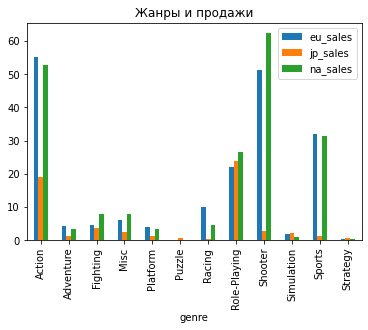

In [64]:
df.query('year_of_release >= 2014 and platform == @list') \
  .pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum') \
  .reset_index().plot(kind='bar', x='genre', title='Жанры и продажи')

Что касается жанров:
В Северной Америке самый популярный жанр Shooter. Далее по убыванию следуют Action, Sports.
В Европе расклад такой Action, за тем Shooter, Sports и Role-Playing.
Япония больше специализируется по ролевым играм Role-Playing , затем идет Action.

Изучим влияние рейтинг ESRB на продажи в отдельном регионе.

<AxesSubplot:title={'center':'Влияние рейтинг ESRB на продажи'}, xlabel='rating'>

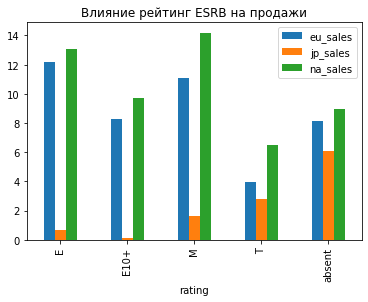

In [65]:
df.query('year_of_release >= 2014 and platform == @lst') \
  .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum') \
  .reset_index().plot(kind='bar', x='rating', title='Влияние рейтинг ESRB на продажи')

Для регионов Северной Америки лидируют игры соответсвующие рэйтингу М  системы ESRB. Не далеко от них ушли игры в категории Е. Продажи в этих группах наиболее высоки. 
Для регионов Европы лидируют игры соответсвующие рэйтингу Е  системы ESRB, далее игры в категории М. 
В Японии же большая часть продаваемых игр не имеет рейтига. Следовательног там рейтинг ESRB на продажи не влияет.

# Шаг 5. Проверка гипотез

Нулевая Гипотеза:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Тогда алтернативная ей будет звучать так: Средние пользовательские рейтинги платформ Xbox One и PC разные.
 
Есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind. 
Чтобы применить данный тест нужно проверить нормальность распределения для данных.

Построим гистограммы распределения оценок.


<AxesSubplot:>

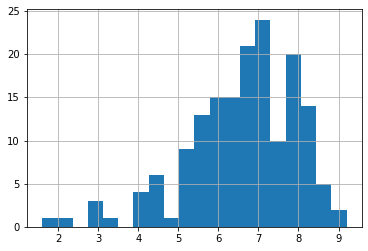

In [72]:
#Для платформы XOne
df_xone = df.query('year_of_release >= 2014 and platform == "XOne"').dropna(subset=['user_score']).reset_index(drop=True)
df_xone['user_score'].hist(bins=20)


<AxesSubplot:>

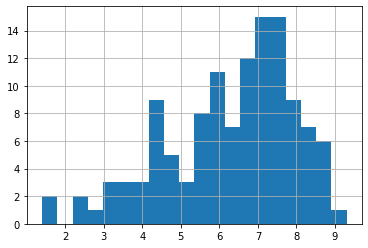

In [73]:
#Для платформы PC
df_pc = df.query('year_of_release >= 2014 and platform == "PC"').dropna(subset=['user_score']).reset_index(drop=True)
df_pc['user_score'].hist(bins=20)


In [74]:
df_pc['user_score'].describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [75]:
df_xone['user_score'].describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

Уровень значимости: alpha =0.05

Посчитаем p-value

equal_var=False, така как у нас разные по размеру выборки (отзывов пользователей PC в четыре раза больше, чем пользователей платформы XOne).

Если p-value будет меньше выбранного уровня значимости, то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [76]:
pc = df_pc['user_score'].tolist()
xone = df_xone['user_score'].tolist()

In [77]:
alpha = 0.05 
results = st.ttest_ind(pc, xone, equal_var=False)
print('p-значение: ', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Проверим следующее предположение: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Пусть нулева гипотеза звучит так: Средние пользовательские рейтинги жанров Action  и Sports  одинаковый.

Тогда альтернативная гипотеза: Средние пользовательские рейтинги жанров Action  и Sports  разный.

Построим гистограммы распределения оценок. По аналогии с задачей выше используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind. 
Проверим нормальность распределения для данных.

<AxesSubplot:>

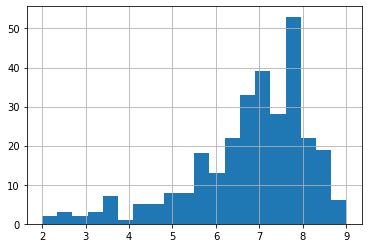

In [78]:
#Для жанра Action
df_action = df.query('year_of_release >= 2014 and genre == "Action"').dropna(subset=['user_score']).reset_index(drop=True)
df_action['user_score'].hist(bins=20)


<AxesSubplot:>

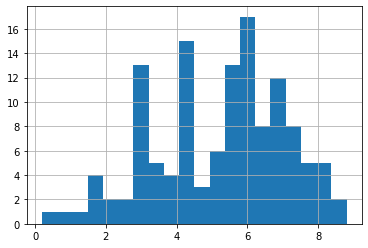

In [79]:
#Для жанра Action
df_sports = df.query('year_of_release >= 2014 and genre == "Sports"').dropna(subset=['user_score']).reset_index(drop=True)
df_sports['user_score'].hist(bins=20)

In [80]:
df_action['user_score'].describe()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [81]:
df_sports['user_score'].describe()

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

Можно сделать первоночальный вывод о том что и распределения и размеры совокупностей похожи.
Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.
Параметр equal_var=True, так как размер  выборок примерно одинаков.

In [82]:
action = df_action['user_score'].tolist()
sports = df_sports['user_score'].tolist()

In [83]:
alpha = 0.05 
results = st.ttest_ind(action, sports)
print('p-значение: ', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.8711147985105864e-19
Отвергаем нулевую гипотезу


Здесь получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action  и Sports  одинаковый.

# Шаг 6.  Общий вывод

На основе данных о продажах игр до 2016 нам необходимо было выявить закономерности, определяющие успешность игр.
В ходе исследования был определен период жизни игровой платформы, который сотавляет 10-12 лет. Нас основании этого мы определили актуальный период, для дальнейшего исследования. Это последние 2 года, чтобы выявить прибыльные направления на следующие 10 лет.

По исследуемому периоду сделали вывод, что к концу 2016 года лидерами по продажам были платформы:
PS4
XOne
3DS

Если делать Анализ по регионам, то для Северной Америки самые популярные игры на платформе PS4 и Xone. В Европе популярна PS4. За ней Xone. 

В Японии Лидер - DS.


Самыу популярныей жанры игр для регионов Америки Shooter и Action. В Европе это Action, Shoters и Sports. Для японского рынка любимым жанром является Role-Playing.

Оценки пользователей на продажи не оказываю никакого влияния.
Но к оценкам критиков можно и прислушаться. 
В конце исследования проверили две гипотезы:

1. Гипотеза:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Данная гипотеза не была отвергнута.

2. Гипотеза о различии средних значений пользовательских оценок игр двух жанров Action и Sports была отвергнута.